# Latihan Praktikum IF3270 2023/2024

Pembuatan model Machine Learning pada umumnya terdiri atas 5 bagian, yaitu:

1. Pengumpulan data
2. Pemahaman dan pemrosesan data
3. Pembuatan model
4. Evaluasi dan tuning model
5. Model final


Pada notebook ini, diharapkan dapat mengimplementasikan sebagian dari tahapan tersebut sebagai latihan.

Dataset yang digunakan adalah [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset). Berikut adalah deskripsi setiap kolom dari dataset (diperoleh dari sumber).

1) **id**: unique identifier
2) **gender**: "Male", "Female" or "Other"
3) **age**: age of the patient
4) **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) **ever_married**: "No" or "Yes"
7) **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) **Residence_type**: "Rural" or "Urban"
9) **avg_glucose_level**: average glucose level in blood
10) **bmi**: body mass index
11) **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) **stroke**: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [16]:
# Import library di sini
import pandas as pd

In [17]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## A. Pemahaman dan Pemrosesan Data

Tahap ini bertujuan untuk memahami ciri dataset serta setiap fitur yang ada pada dataset. Secara garis besar, hal yang dicari pada tahap ini adalah

1. Ukuran data
2. Statistik setiap fitur
3. Data pencilan (outlier)
4. Korelasi
5. Penanganan data

### A.1. Ukuran Data

Tentukan ukuran data secara baris dan kolom

In [18]:
print("Ukuran Data")
print("Jumlah Baris :", df.shape[0])
print("Jumlah Kolom :", df.shape[1])

Ukuran Data
Jumlah Baris : 5110
Jumlah Kolom : 12


### A.2. Statistik setiap fitur

Dibantu penggunaan library Pandas, jawab pertanyaan berikut:
1. Kolom apa saja yang merupakan fitur kategorikal?
2. Kolom apa saja yang merupakan fitur nonkategorikal?

- Untuk setiap kolom kategorikal, tentukan jumlah dari masing-masing kategori pada kolom tersebut
- Untuk setiap kolom nonkategorikal, cari nilai minimum, maksimum, median, dan rata-ratanya

In [19]:
fitur_kategorikal = df.select_dtypes(include=['object']).columns.tolist()
fitur_nonkategorikal = df.select_dtypes(exclude=['object']).columns.tolist()

print("Fitur Kategorikal :", fitur_kategorikal)
print("Fitur Non-kategorikal :", fitur_nonkategorikal)

print("\n\nStatistik Fitur Kategorikal")
for kolom in fitur_kategorikal:
    print()
    print(df[kolom].value_counts())

print("\nStatistik Fitur Non-kategorikal")
for kolom in fitur_nonkategorikal:
    print(f"{kolom}: Min={df[kolom].min()}, Max={df[kolom].max()}, Median={df[kolom].median()}, Mean={df[kolom].mean()}")



Fitur Kategorikal : ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Fitur Non-kategorikal : ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


Statistik Fitur Kategorikal

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

Statistik Fitur Non-kategorikal
id: Min=67, Max=72940, Median=36932.0, Mean=36517.82935420744
age: Min=0.08, Max=82.0, Median=45.0, Mean=43.226614481409
hypertension: Min=0, Max=1, Median=0.0, Mean=0.0974559686888454
heart_disease: Min=0, Max=1, Median=0.0, Mean=0.0

### A.3. Data Pencilan

1. Tentukan jika ada missing value dari setiap fitur
2. Tentukan outlier dari setiap fitur

In [20]:
print("Missing value per fitur")
print(df.isnull().sum())
print()

outliers = {}
for kolom in fitur_nonkategorikal:
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[kolom] = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]
    print(f"Outlier di kolom {kolom} : {outliers[kolom].shape[0]} baris")

Missing value per fitur
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Outlier di kolom id : 0 baris
Outlier di kolom age : 0 baris
Outlier di kolom hypertension : 498 baris
Outlier di kolom heart_disease : 276 baris
Outlier di kolom avg_glucose_level : 627 baris
Outlier di kolom bmi : 110 baris
Outlier di kolom stroke : 249 baris


### A.4. Korelasi

Buatlah heatmap dari dataset. Fitur apa yang paling berkorelasi?

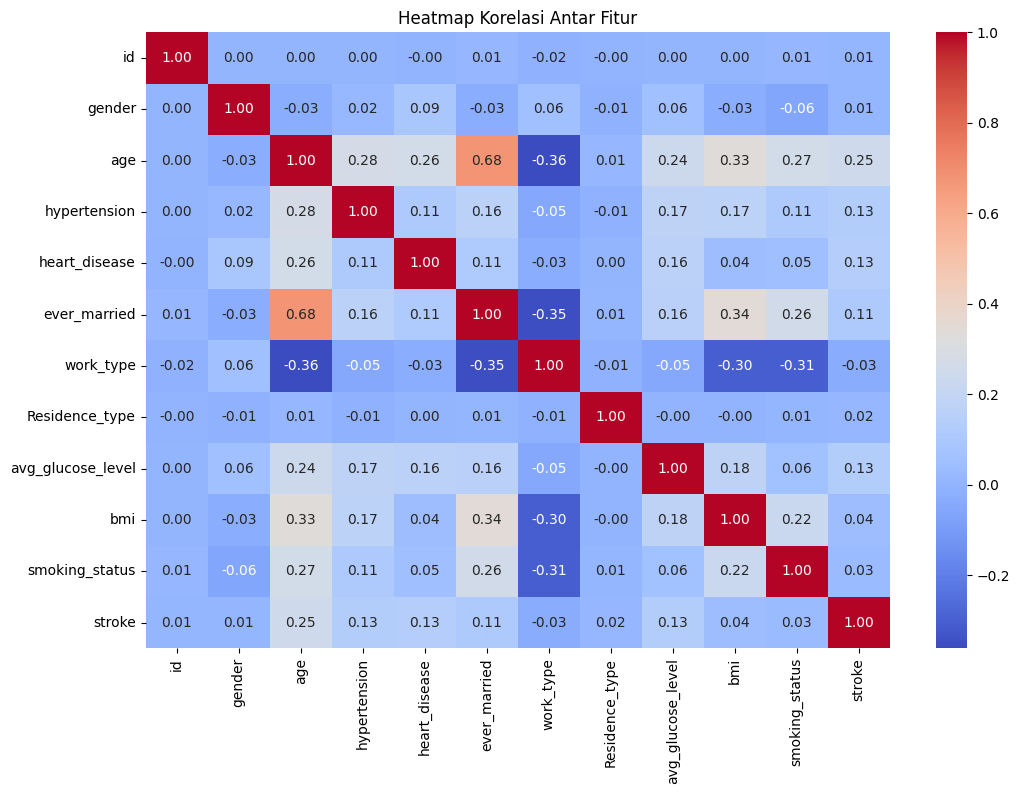

In [21]:
from sklearn.preprocessing import LabelEncoder
import seaborn as  sns
import matplotlib.pyplot as plt

encoder = LabelEncoder()
for kolom in fitur_kategorikal:
    df[kolom] = encoder.fit_transform(df[kolom].astype(str))

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

### A.5. Penanganan Data

Pada A.1 hingga A.4, kamu telah melakukan pencarian insight pada data. Apabila diperlukan, lakukan analisis mandiri lebih lanjut.

Berikutnya, lakukan pemrosesan sebelum dataset dapat digunakan untuk training model. Kamu dapat melakukan berbagai macam pemrosesan, berikut adalah beberapa contohnya.
1) Menangani nilai yang hilang: Buang fitur atau ganti nilai yang hilang dengan strategi tertentu.
2) Transformasi fitur kategorikal: Ubah menjadi representasi angka seperti penggunaan one-hot encoding atau label encoding
3) Scaling: Dapat menggunakan MinMaxScaler, StandardScaler, atau scaler lainnya.
4) Membuang fitur yang sekiranya tidak diperlukan.
5) Menambah fitur dari fitur yang sudah ada (feature engineering).

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Mengganti nilai yang hilang
df.fillna(df.mean(), inplace=True)

# Transofrmasi fitur kategorikal
label_encoder = LabelEncoder()
for kolom in fitur_kategorikal:
    df[kolom] = label_encoder.fit_transform(df[kolom])

# Scaling
scaler = MinMaxScaler()
df[fitur_nonkategorikal] = scaler.fit_transform(df[fitur_nonkategorikal])

print("Pemrosesan data selesai")

Pemrosesan data selesai


## B. Design of Experiment
Tentukanlah metrik yang akan digunakan pada eksperimen kali ini. Metrik yang dapat lebih dari satu jenis.

Metrik utama yang akan digunakan dalam eksperimen adalah F1-score. F1-score adalah hasil rata-rata harmonis dari nilai _precision_ dan _recall_. F1-score mempertimbangkan nilai _precision_ dan _recall_ dan menghasilkan sebuah metrik yang seimbang, sehingga apabila salah satu nilai _precision_ atau _recall_ lebih rendah, salah satu nilai akan menyeimbangkan mettrik lainnya.

Nilai F1 yang tinggi melambangkan nilai _precision_ dan _recall_ yang tinggi, dan memberikan hasil yang baik pada permasalahan klasifikasi data yang imbalanced. Akan tetapi, nilai F1 yang rendah sulit memberikan informasi mengenai metrik yang bernilai rendah.

Ada beberapa alasan untuk menggunakan F1-score:
- F1-score memberikan _measure_ yang lebih baik untuk persoalan dataset yang tidak seimbang. Dalam kasus dataset ini, _instance_ dengan nilai positif lebih banyak dibandingkan _instance_ dengan nilai negatif, sehingga akurasi dapat menjadi metrik yang tidak tepat, sehingga lebih baik menggunakan F1-score yang mempertimbangkan nilai _precision_ dan _recall_
- F1-score sudah menggambarkan kemampuan model untuk memprediksi dan mengidentifikasi kelas data positif dan negatif dalam klasifikasi biner
- Pada eksperimen ini, akan dilakukan beberapa perbandingan model (_Logistic Regression_, _XGBoost_, hasil hiperparameter, hasil _oversampling / undersampling_, hasil _voting_), dan nilai F1-score cocok digunakan untuk membandingkan kemampuan antar model.


Selain F1, metrik lain yang dapat digunakan adalah akurasi, yang menggambarkan seberapa tepat sebuah model dapat melakukan klasifikasi. Nilai akurasi dapat digunakan untuk membandingkan ketepatan klasifikasi dua buah model apabila nilai F1-nya sama.

### B.1. Dataset Split

Lakukan pemisahan antara data training (80%) dan data validasi (20%). Kolom `stroke` adalah target pada dataset ini.

In [23]:
from sklearn.model_selection import train_test_split

# Fitur dan target
X = df.drop('stroke', axis=1)
Y = df['stroke']

# Memisahkan data menjadi training dan validasi
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Data training dan validasi berhasil dipisahkan")

Data training dan validasi berhasil dipisahkan


### B.2. Baseline Training

Lakukan training dengan menggunakan `LogisticRegression`. Evaluasi hasilnya dengan confusion matrix dan deskripsikan dengan singkat hal yang terjadi pada model tersebut.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Training Logistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)

# Prediksi dan Evaluasi Model
Y_pred = model.predict(X_val)
conf_matrix = confusion_matrix(Y_val, Y_pred)
print("Confussion Matrix")
print(conf_matrix)
print("\nClassification Report")
print(classification_report(Y_val, Y_pred))

Confussion Matrix
[[960   0]
 [ 62   0]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       960
         1.0       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### B.3. Hyperparameter Tuning

Lakukan pengaturan hyperparameter pada model Logistic Regression dan training kembali. Apakah hasilnya berubah?

In [25]:
from sklearn.model_selection import GridSearchCV

# Definisi Parameter Grid
param_grid = {
    'C': [0.1, 1, 10],
    'max_iter': [100, 200, 300]
}

# Grid search untuk tuning hyperparameter
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, Y_train)

# Hasil terbaik dan evaluasi
print("Best Parameter :", grid_search.best_params_)
best_model = grid_search.best_estimator_
Y_pred_best = best_model.predict(X_val)
print("\nClassification Report After Tuning")
print(classification_report(Y_val, Y_pred_best))


Best Parameter : {'C': 0.1, 'max_iter': 100}

Classification Report After Tuning
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       960
         1.0       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### B.4. Training Model Lain

Kamu dapat melakukan training dengan model-model lain seperti Random Forest, Decision Tree, dan KNN serta atur hyperparameter-nya. Bandingkan hasilnya dengan baseline Logistic Regression.

[Referensi](https://scikit-learn.org/stable/supervised_learning.html)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Train beberapa model lain
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

# Evaluasi setiap model
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_val)
    print(f"\n{name} - Classification Report:")
    print(classification_report(Y_val, Y_pred))



Random Forest - Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       960
         1.0       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Decision Tree - Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       960
         1.0       0.22      0.18      0.19        62

    accuracy                           0.91      1022
   macro avg       0.58      0.57      0.57      1022
weighted avg       0.90      0.91      0.91      1022


KNN - Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       960
         1.0       0.40      0.03      0.06        62

    accuracy                           0.94      1022
   macro avg      

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## C. Improvement

Dataset imbalance merupakan kasus yang umum terjadi saat pembuatan model machine learning. Kasus ini dapat diatasi dengan melakukan oversampling pada target minoritas ataupun undersampling pada dataset mayoritas.

[Referensi](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

### C.1. Oversampling

Lakukan strategi oversampling pada dataset mayoritas. Training kembali model baseline dan lakukan evaluasi dengan confusion matrix.

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report

# Implementasi Oversampling dengan SMOTE
smote = SMOTE()
X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)

# Training model Logistic Regression pada data yang sudah di oversampled
model_smote = LogisticRegression()
model_smote.fit(X_resampled, Y_resampled)

# Evaluasi model 
Y_pred_smote = model_smote.predict(X_val)
print("Confussion Matrix after SMOTE Oversampling")
print(confusion_matrix(Y_val, Y_pred_smote))
print("\nClassification Report after SMOTE Oversampling")
print(classification_report(Y_val, Y_pred_smote))

Confussion Matrix after SMOTE Oversampling
[[720 240]
 [ 16  46]]

Classification Report after SMOTE Oversampling
              precision    recall  f1-score   support

         0.0       0.98      0.75      0.85       960
         1.0       0.16      0.74      0.26        62

    accuracy                           0.75      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.93      0.75      0.81      1022



### C.2. Undersampling
Lakukan strategi undersampling pada dataset minoritas. Training kembali model dan lakukan evaluasi dengan confusion matrix.

In [28]:
from imblearn.under_sampling import RandomUnderSampler

# Implementasi Undersampling
undersampler = RandomUnderSampler()
X_resampled_under, Y_resampled_under = undersampler.fit_resample(X_train, Y_train)

# Training model Logistic Regression pada data yang sudah di undersample
model_under = LogisticRegression()
model_under.fit(X_resampled_under, Y_resampled_under)

# Evaluasi model
Y_pred_under = model_under.predict(X_val)
print("Confusion Matrix after Undersampling:")
print(confusion_matrix(Y_val, Y_pred_under))
print("\nClassification Report after Undersampling:")
print(classification_report(Y_val, Y_pred_under))

Confusion Matrix after Undersampling:
[[696 264]
 [ 15  47]]

Classification Report after Undersampling:
              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83       960
         1.0       0.15      0.76      0.25        62

    accuracy                           0.73      1022
   macro avg       0.57      0.74      0.54      1022
weighted avg       0.93      0.73      0.80      1022



### C.3. Model Ensembling

Sebagai tambahan dari strategi oversampling dan undersampling, kinerja prediksi dapat ditingkatkan dengan membuat beberapa model berbeda menjadi satu model utuh. Contohnya adalah penggabungan Logistic Regression dan Random Forest.

Dari scikit-learn, terdapat dua jenis ensembling paling umum yaitu Voting Classifier dan Stacking Classifier. Gunakan kedua strategi ini pada jenis-jenis model yang berbeda, lakukan training pada oversampled atau undersampled data dan bandingkan hasilnya dengan baseline Logistic Regression.

[Referensi](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)

In [29]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier())
], voting='soft')
voting_clf.fit(X_resampled, Y_resampled)

# Evaluasi Voting Classfier
Y_pred_voting = voting_clf.predict(X_val)
print("Confussion Matrix for Voting Classifier")
print(confusion_matrix(Y_val, Y_pred_voting))
print("\nClassification Report for Voting Classifier")
print(classification_report(Y_val, Y_pred_voting))

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier())
], final_estimator=LogisticRegression())
stacking_clf.fit(X_resampled, Y_resampled) # Training pada data oversampled

# Evaluasi Stacking Classifier
Y_pred_stacking = stacking_clf.predict(X_val)
print("Confussion Matrix for Stacking Classifier")
print(confusion_matrix(Y_val, Y_pred_stacking))
print("\nConfussion Matrix for Stacking Classifier")
print(classification_report(Y_val, Y_pred_stacking))




Confussion Matrix for Voting Classifier
[[811 149]
 [ 28  34]]

Classification Report for Voting Classifier
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90       960
         1.0       0.19      0.55      0.28        62

    accuracy                           0.83      1022
   macro avg       0.58      0.70      0.59      1022
weighted avg       0.92      0.83      0.86      1022

Confussion Matrix for Stacking Classifier
[[914  46]
 [ 55   7]]

Confussion Matrix for Stacking Classifier
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       960
         1.0       0.13      0.11      0.12        62

    accuracy                           0.90      1022
   macro avg       0.54      0.53      0.53      1022
weighted avg       0.89      0.90      0.90      1022



## D. Model Final
Tentukan model yang memiliki kinerja terbaik serta berikan alasannya.

In [30]:
from sklearn.metrics import f1_score

# Evaluasi F1-score dari semua model
f1_score = {
    'Baseline': f1_score(Y_val, model.predict(X_val)),
    'SMOTE': f1_score(Y_val, model_smote.predict(X_val)),
    'Undersampling': f1_score(Y_val, model_under.predict(X_val)),
    'Voting Classifier': f1_score(Y_val, voting_clf.predict(X_val)),
    'Stacking Classifier': f1_score(Y_val, stacking_clf.predict(X_val))
}

# Cetak F1-score dari semua model
print("F1-Scores of Different Models")
for model_name, f1 in f1_score.items():
    print(f"{model_name}: {f1:.4f}")

# Menentukan model dengan F1-score tertinggi
best_model_name = max(f1_score, key=f1_score.get)
best_f1_score = f1_score[best_model_name]
print(f"\nModel with the best F1-score: {best_model_name} ({best_f1_score:.4f})")

# Alasan pemilihan 
print("\nAlasan pemilihan model")
print(f"Model '{best_model_name}' dipilih sebagai model terbaik karena memiliki F1-score tertinggi di antara semua model yang diuji.")
print("Ini menunjukkan bahwa model ini memiliki keseimbangan terbaik antara precision dan recall, yang sangat penting dalam menangani dataset yang tidak seimbang.")

F1-Scores of Different Models
Baseline: 0.0597
SMOTE: 0.2644
Undersampling: 0.2520
Voting Classifier: 0.2776
Stacking Classifier: 0.1217

Model with the best F1-score: Voting Classifier (0.2776)

Alasan pemilihan model
Model 'Voting Classifier' dipilih sebagai model terbaik karena memiliki F1-score tertinggi di antara semua model yang diuji.
Ini menunjukkan bahwa model ini memiliki keseimbangan terbaik antara precision dan recall, yang sangat penting dalam menangani dataset yang tidak seimbang.
